<h1>Dataset Information</h1>
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients from April 2005 to September 2005.

Content
There are 25 variables:
<ul>
<li>ID: ID of each client
<li>LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
<li>SEX: Gender (1=male, 2=female)
<li>EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<li>MARRIAGE: Marital status (1=married, 2=single, 3=others)
<li>AGE: Age in years
<li>PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
<li>PAY_2: Repayment status in August, 2005 (scale same as above)
<li>PAY_3: Repayment status in July, 2005 (scale same as above)
<li>PAY_4: Repayment status in June, 2005 (scale same as above)
<li>PAY_5: Repayment status in May, 2005 (scale same as above)
<li>PAY_6: Repayment status in April, 2005 (scale same as above)
<li>BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
<li>BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
<li>BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
<li>BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
<li>BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
<li>BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
<li>PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
<li>PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
<li>PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
<li>PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
<li>PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
<li>PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
<li>default.payment.next.month: Default payment (1=yes, 0=no)
</ul>

In [468]:
import pandas as pd
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [469]:
df = pd.read_csv('data.csv')

In [470]:
df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,female,others,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [471]:
df.tail(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29991,29991,140000,male,university,married,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29992,210000,male,university,married,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29993,29993,10000,male,high school,married,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29994,29994,100000,male,graduate school,single,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29995,80000,male,university,single,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,male,university,married,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [472]:
df.shape

(30001, 25)

In [473]:
# Let's rename the header of the data
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [474]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [475]:
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,female,18112
EDUCATION,29669,5,university,14030
MARRIAGE,29677,3,single,15964
AGE,30000,63,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [476]:
df.isnull().sum()

0
ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

Education, Marriage have missing data

In [477]:
df.MARRIAGE.value_counts()
df.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64

In [478]:
df = df.fillna(df.mode().iloc[0])

In [479]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is "0" value in each Education and Marriage collumns, let's drop it.

In [480]:
df.drop(df[df['EDUCATION'] == "0"].index, inplace=True)
df.drop(df[(df['MARRIAGE'] == "0")].index, inplace=True)

In [481]:
df.MARRIAGE.value_counts()

single     16277
married    13655
Name: MARRIAGE, dtype: int64

In [482]:
df.EDUCATION.value_counts()

university         14355
graduate school    10581
high school         4872
others               124
Name: EDUCATION, dtype: int64

In [483]:
df.rename(columns={'default payment next month':'def_pay'}, inplace=True)

In [484]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#Visualization

In [485]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

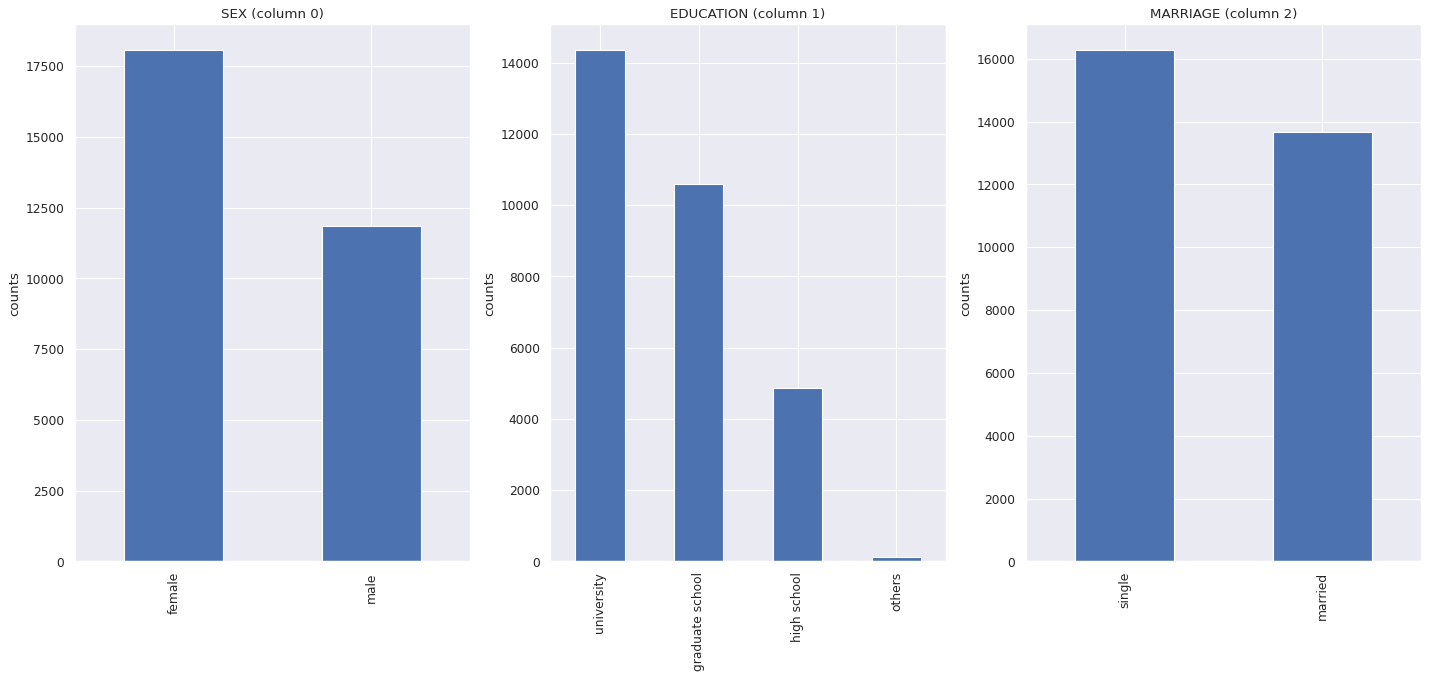

In [486]:
plotPerColumnDistribution(df, 3, 3)


In [487]:
deff = df['def_pay'].replace({'0': 'repay', '1': 'defult'})

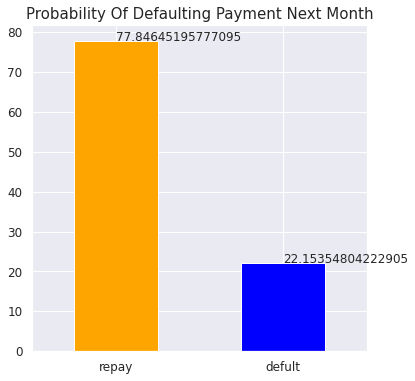

In [488]:
def_cnt = (deff.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6), color=['orange', 'blue'])
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

We can see that the dataset consists of 77.8% clients are not expected to default payment whereas 23% clients are expected to default the payment.

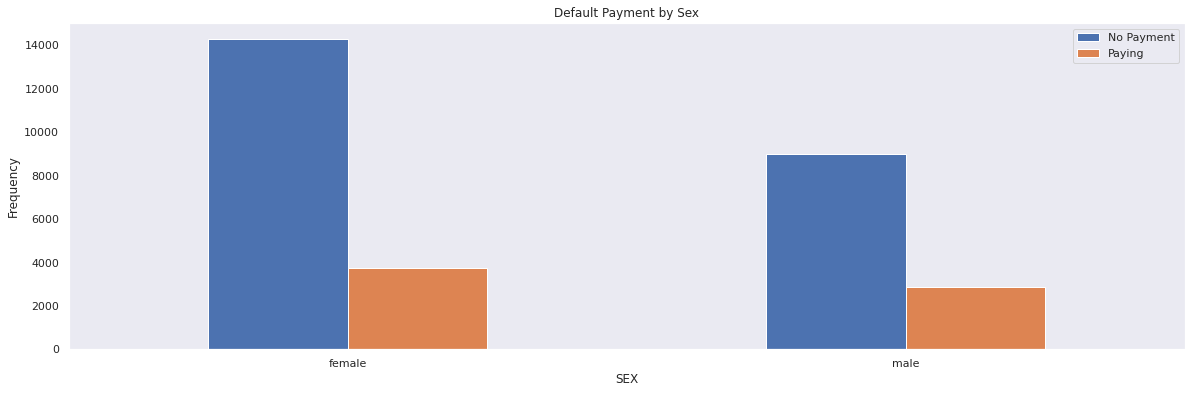

In [489]:
pd.crosstab(df['SEX'],df['def_pay']).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Sex')
plt.legend(["No Payment", "Paying"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

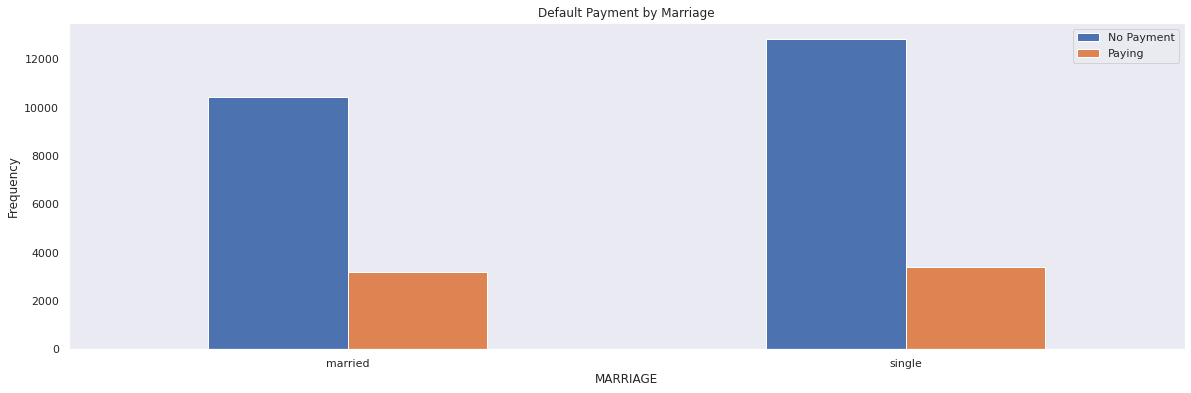

In [490]:
pd.crosstab(df['MARRIAGE'],df['def_pay']).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Marriage')
plt.legend(["No Payment", "Paying"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

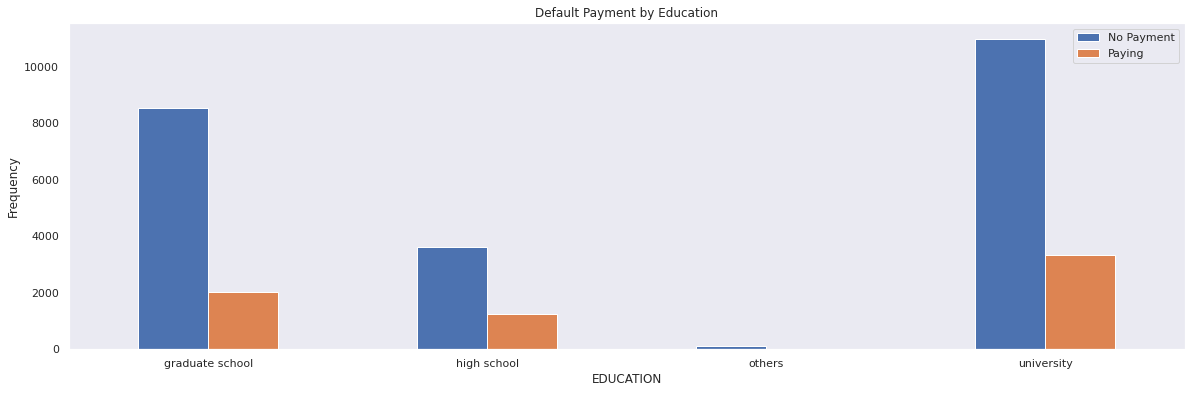

In [491]:
pd.crosstab(df['EDUCATION'],df['def_pay']).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Education')
plt.legend(["No Payment", "Paying"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

#Encoding

##One hot encoding

In [492]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['EDUCATION', 'MARRIAGE','SEX']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)


In [493]:
final_df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)

In [494]:
final_df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,def_pay,0,1,2,3,4,5,6,7
1,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,120000,26,-1,2,0,0,0,2,2682,...,2000,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,90000,34,0,0,0,0,0,0,29239,...,5000,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,4,50000,37,0,0,0,0,0,0,46990,...,1000,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,5,50000,57,-1,0,-1,0,0,0,8617,...,679,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [495]:
final_df.dropna(inplace=True)

#Predictive Models

In [496]:
# Split the data into train and test dataset
X= final_df.loc[:, final_df.columns != 'def_pay']
y = final_df['def_pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [497]:
X_train.isnull().sum()

ID           0
LIMIT_BAL    0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
dtype: int64

##Logistic Regression

In [498]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression()
lgclassifier.fit(X_train, y_train)
lgprediction = lgclassifier.predict(X_test)
print('Accuracy of Logistic Regression Classifier: ',accuracy_score(lgprediction,y_test))

Accuracy of Logistic Regression Classifier:  0.7781684245772643


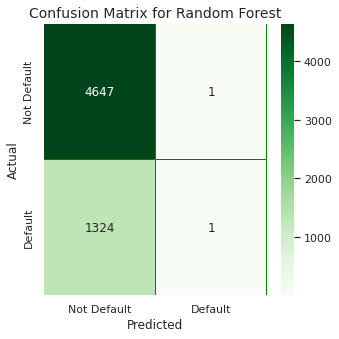

Roc Score:  0.5002697853408242


In [499]:
cmrf = pd.crosstab(y_test.values, lgprediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmrf, fmt="d",
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Green", cmap="Greens")
plt.title('Confusion Matrix for Random Forest', fontsize=14)
plt.show()

rocaucscorerf=roc_auc_score(y_test.values, lgprediction)
print('Roc Score: ',rocaucscorerf)

##Random Forest

In [500]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve
import itertools
from sklearn.model_selection import GridSearchCV

In [501]:
rfclassifier = RandomForestClassifier(random_state=42,n_estimators=200,criterion='entropy',
                                       max_features='sqrt',max_depth=7,verbose=False)
rfclassifier.fit(X_train, y_train)
rfprediction = rfclassifier.predict(X_test)
print('Accuracy of Random Forest Classifier: ',accuracy_score(rfprediction,y_test))

Accuracy of Random Forest Classifier:  0.8170098777833584


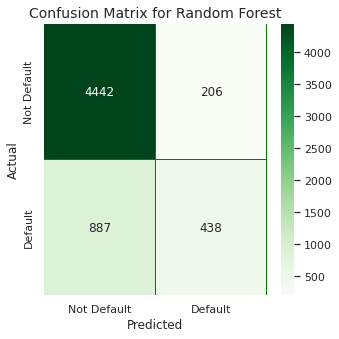

Roc Score:  0.6431229500211086


In [502]:
cmrf = pd.crosstab(y_test.values, rfprediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmrf, fmt="d",
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Green", cmap="Greens")
plt.title('Confusion Matrix for Random Forest', fontsize=14)
plt.show()

rocaucscorerf=roc_auc_score(y_test.values, rfprediction)
print('Roc Score: ',rocaucscorerf)

##AdaBoost

In [503]:
adaboostclassifier = AdaBoostClassifier(base_estimator=None, 
                                         n_estimators=50, 
                                         learning_rate=1.5, 
                                         algorithm='SAMME', 
                                         random_state=42)

adaboostclassifier.fit(X_train, y_train.values)
adaboostprediction = adaboostclassifier.predict(X_test)
print('Accuracy of Ada Boost:', accuracy_score(adaboostprediction,y_test))

Accuracy of Ada Boost: 0.8133266365310564


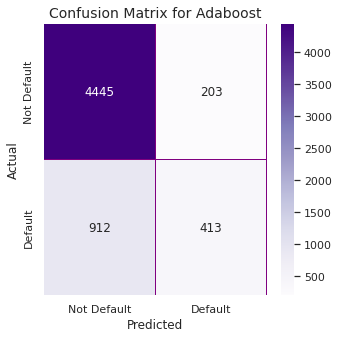

Roc Score:  0.6340117072061833


In [504]:
cmadaboost = pd.crosstab(y_test.values, adaboostprediction, 
                     rownames=['Actual'], colnames=['Predicted'])
fig, (ax4) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmadaboost, fmt="d",
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax4,
            linewidths=.2,linecolor="Purple", cmap="Purples")
plt.title('Confusion Matrix for Adaboost', fontsize=14)
plt.show()

rocaucscoreadaboost=roc_auc_score(y_test.values, adaboostprediction)
print('Roc Score: ',rocaucscoreadaboost)